In [3]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# kiểm tra số mẫu dữ liệu
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


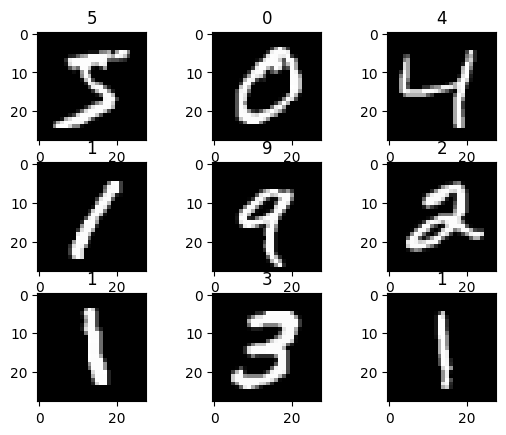

In [4]:
# vẽ một số dữ liệu ở tập train
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.title(str(y_train[i]))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# chuyển dữ liệu y_train từ label sang encode
# chuyển dữ liệu x_train về khoảng 0 và 1
from tensorflow.keras.utils import to_categorical
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[:9])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [6]:
# định nghĩa hàm loss
loss_fn = tf.keras.losses.CategoricalCrossentropy()

# định nghĩa thuật toán tối ưu
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# xây dựng mô hình
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ])
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    return model

In [7]:
# tạo mô hình và in ra bảng tổng kết
model = create_model()
model.summary()

d:\Workspace\TriTueNhanTao\envs\ai_class\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,866 (788.54 KB)

 Trainable params: 201,866 (788.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# xây dựng hàm lưu lại mô hình dựa theo loss của tập validation
weights_filepath = './weights/model.keras'
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = weights_filepath, 
    monitor='val_loss', 
    verbose=1,
    save_best_only=False,
    save_weights_only=False
)


# bắt đầu training
his = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_split=0.2, callbacks=callback)

Epoch 1/50
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4331 - loss: 1.9755
Epoch 1: saving model to ./weights/model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4347 - loss: 1.9719 - val_accuracy: 0.8520 - val_loss: 0.6767
Epoch 2/50
365/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8490 - loss: 0.6028
Epoch 2: saving model to ./weights/model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.6007 - val_accuracy: 0.8906 - val_loss: 0.3992
Epoch 3/50
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.4159
Epoch 3: saving model to ./weights/model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.4155 - val_accuracy: 0.9020 - val_loss: 0.3359
Epoch 4/50
356/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8992 - loss: 0.3531
Epoch 4: saving model to ./weights/model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.3525 - val_accuracy: 0.9107 - val_loss: 0.3035


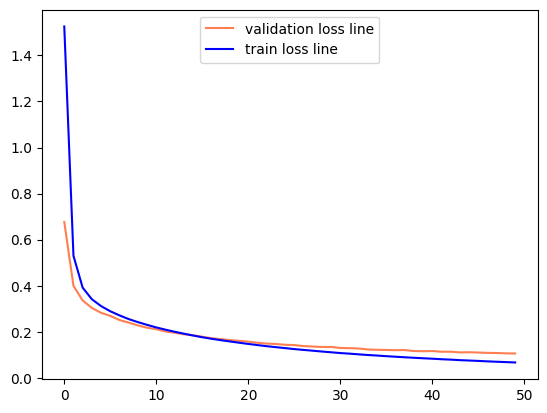

In [18]:
# vẽ đường loss trên tập train và tập validation
plt.plot(his.history['val_loss'], c = 'coral', label='validation loss line')
plt.plot(his.history['loss'], c = 'blue', label='train loss line')
legend = plt.legend(loc='upper center')
plt.show()

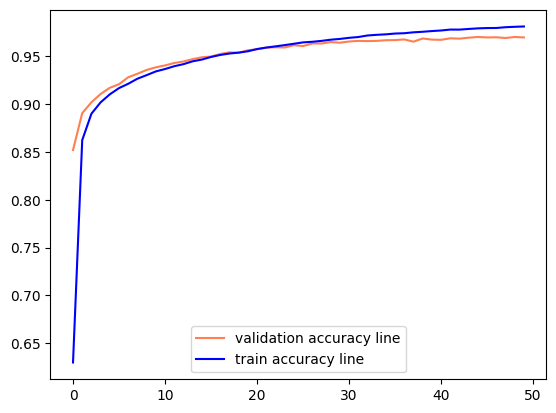

In [19]:
# vẽ đường accuracy trên tập train và tập validation
plt.plot(his.history['val_accuracy'], c = 'coral', label='validation accuracy line')
plt.plot(his.history['accuracy'], c = 'blue', label='train accuracy line')
legend = plt.legend(loc='lower center')
plt.show()

In [20]:
# load file mô hình đã huấn luyện
model = create_model()
model = tf.keras.models.load_model(weights_filepath)

# đánh giá mô hình trên tập test
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('loss tập test = ', loss, '| accuracy tập test = ', acc)

d:\Workspace\TriTueNhanTao\envs\ai_class\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


loss tập test =  0.09939347207546234 | accuracy tập test =  0.9710999727249146


shape của 1 bức ảnh  (28, 28)
shape phù hợp với mô hình là 3 chiều  (1, 28, 28)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
số dự đoán là:  9


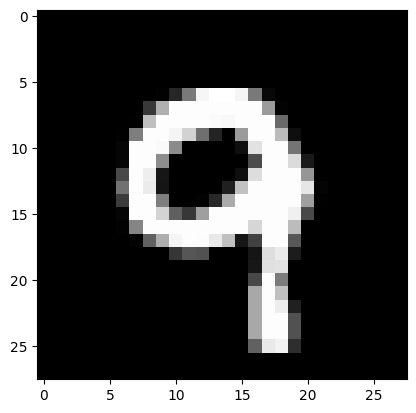

In [21]:
# lấy 1 hình ảnh bất kỳ ở tập test và dự đoán
import numpy as np
input_image = x_test[99]
plt.imshow(input_image, cmap=plt.get_cmap('gray'))
print('shape của 1 bức ảnh ', input_image.shape)
input_image = np.expand_dims(input_image, axis=0)
print('shape phù hợp với mô hình là 3 chiều ', input_image.shape)

output = model.predict(input_image)
print('số dự đoán là: ', output.argmax())